**- What to learn and what to predict?**

Home Credit makes use of a variety of alternative data--including telco and transactional information--to predict their clients' repayment abilities.

**- What kind of file to create and submit to Kaggle?**

For each SK_ID_CURR in the test set, you must predict a probability for the TARGET variable. The file should contain a header and have the following format:

```
SK_ID_CURR,TARGET
100001,0.1
100005,0.9
100013,0.2
etc.
```

**- What kind of index value will the submitted work be evaluated by?**

Submissions are evaluated on area under the ROC curve between the predicted probability and the observed target.

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv('application_train.csv')
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
df.shape

(307511, 122)

In [5]:
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
data = pd.concat([total,percent], axis=1, keys=['Total','Percentage'])
data

,Total,Percentage
COMMONAREA_MEDI,214865,0.698723
COMMONAREA_AVG,214865,0.698723
COMMONAREA_MODE,214865,0.698723
NONLIVINGAPARTMENTS_MODE,213514,0.694330
NONLIVINGAPARTMENTS_AVG,213514,0.694330
...,...,...
NAME_HOUSING_TYPE,0,0.000000
NAME_FAMILY_STATUS,0,0.000000
NAME_EDUCATION_TYPE,0,0.000000
NAME_INCOME_TYPE,0,0.000000


In [6]:
features = data[data.Percentage < 0.1]
features

,Total,Percentage
NAME_TYPE_SUITE,1292,0.004201
OBS_30_CNT_SOCIAL_CIRCLE,1021,0.003320
DEF_30_CNT_SOCIAL_CIRCLE,1021,0.003320
OBS_60_CNT_SOCIAL_CIRCLE,1021,0.003320
DEF_60_CNT_SOCIAL_CIRCLE,1021,0.003320
...,...,...
NAME_HOUSING_TYPE,0,0.000000
NAME_FAMILY_STATUS,0,0.000000
NAME_EDUCATION_TYPE,0,0.000000
NAME_INCOME_TYPE,0,0.000000


In [7]:
features.index

Index(['NAME_TYPE_SUITE', 'OBS_30_CNT_SOCIAL_CIRCLE',
       'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE',
       'DEF_60_CNT_SOCIAL_CIRCLE', 'EXT_SOURCE_2', 'AMT_GOODS_PRICE',
       'AMT_ANNUITY', 'CNT_FAM_MEMBERS', 'DAYS_LAST_PHONE_CHANGE',
       'CNT_CHILDREN', 'FLAG_DOCUMENT_8', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4',
       'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7',
       'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_21', 'FLAG_DOCUMENT_10',
       'FLAG_DOCUMENT_11', 'FLAG_OWN_REALTY', 'FLAG_DOCUMENT_13',
       'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16',
       'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19',
       'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_12', 'AMT_CREDIT',
       'AMT_INCOME_TOTAL', 'FLAG_PHONE', 'LIVE_CITY_NOT_WORK_CITY',
       'REG_CITY_NOT_WORK_CITY', 'TARGET', 'REG_CITY_NOT_LIVE_CITY',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_REGION_NOT_WORK_

In [8]:
df1 = df[features.index]
df1.head()

,NAME_TYPE_SUITE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,EXT_SOURCE_2,AMT_GOODS_PRICE,AMT_ANNUITY,CNT_FAM_MEMBERS,DAYS_LAST_PHONE_CHANGE,...,DAYS_ID_PUBLISH,DAYS_REGISTRATION,DAYS_EMPLOYED,DAYS_BIRTH,REGION_POPULATION_RELATIVE,NAME_HOUSING_TYPE,NAME_FAMILY_STATUS,NAME_EDUCATION_TYPE,NAME_INCOME_TYPE,SK_ID_CURR
0,Unaccompanied,2.0,2.0,2.0,2.0,0.262949,351000.0,24700.5,1.0,-1134.0,...,-2120,-3648.0,-637,-9461,0.018801,House / apartment,Single / not married,Secondary / secondary special,Working,100002
1,Family,1.0,0.0,1.0,0.0,0.622246,1129500.0,35698.5,2.0,-828.0,...,-291,-1186.0,-1188,-16765,0.003541,House / apartment,Married,Higher education,State servant,100003
2,Unaccompanied,0.0,0.0,0.0,0.0,0.555912,135000.0,6750.0,1.0,-815.0,...,-2531,-4260.0,-225,-19046,0.010032,House / apartment,Single / not married,Secondary / secondary special,Working,100004
3,Unaccompanied,2.0,0.0,2.0,0.0,0.650442,297000.0,29686.5,2.0,-617.0,...,-2437,-9833.0,-3039,-19005,0.008019,House / apartment,Civil marriage,Secondary / secondary special,Working,100006
4,Unaccompanied,0.0,0.0,0.0,0.0,0.322738,513000.0,21865.5,1.0,-1106.0,...,-3458,-4311.0,-3038,-19932,0.028663,House / apartment,Single / not married,Secondary / secondary special,Working,100007


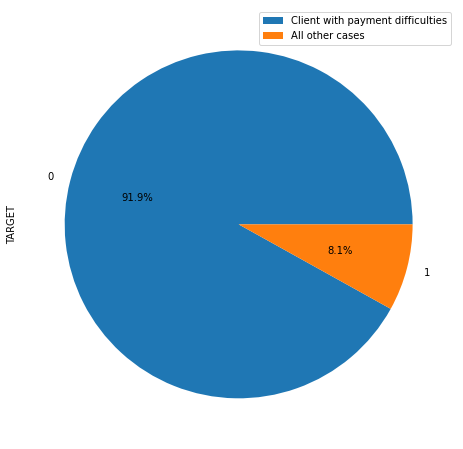

In [9]:
tg = df["TARGET"].value_counts()
plt.subplots(figsize=(12,8))
pie_target = tg.plot.pie(autopct="%.1f%%")
pie_target.legend(loc=1, labels={'Client with payment difficulties': 0, 'All other cases': 1})
plt.show()

In [10]:
def dummy_variable_all(df, sort_frequence=True, dropna=True, map_show=False, skip_column=[]):
    for column_name in df:
        if np.dtype(df[column_name]) == 'O' and column_name not in skip_column:
            if sort_frequence:
                unique_value = df[column_name].value_counts(dropna=dropna).sort_values().index
            else:
                unique_value = df[column_name].value_counts(dropna=dropna).sort_index().index
            name_map = {}
            for i, value in enumerate(unique_value):
                name_map[value] = i
            if map_show:
                print('column_name :', column_name)
                print('replace :', name_map)
            df[column_name] = df[column_name].map(name_map)
    return df

In [11]:
df2 = dummy_variable_all(df.copy(), dropna=False, map_show=True)
df2.fillna(df2.median(), inplace=True)

column_name : NAME_CONTRACT_TYPE
replace : {'Revolving loans': 0, 'Cash loans': 1}
column_name : CODE_GENDER
replace : {'XNA': 0, 'M': 1, 'F': 2}
column_name : FLAG_OWN_CAR
replace : {'Y': 0, 'N': 1}
column_name : FLAG_OWN_REALTY
replace : {'N': 0, 'Y': 1}
column_name : NAME_TYPE_SUITE
replace : {'Group of people': 0, 'Other_A': 1, nan: 2, 'Other_B': 3, 'Children': 4, 'Spouse, partner': 5, 'Family': 6, 'Unaccompanied': 7}
column_name : NAME_INCOME_TYPE
replace : {'Maternity leave': 0, 'Businessman': 1, 'Student': 2, 'Unemployed': 3, 'State servant': 4, 'Pensioner': 5, 'Commercial associate': 6, 'Working': 7}
column_name : NAME_EDUCATION_TYPE
replace : {'Academic degree': 0, 'Lower secondary': 1, 'Incomplete higher': 2, 'Higher education': 3, 'Secondary / secondary special': 4}
column_name : NAME_FAMILY_STATUS
replace : {'Unknown': 0, 'Widow': 1, 'Separated': 2, 'Civil marriage': 3, 'Single / not married': 4, 'Married': 5}
column_name : NAME_HOUSING_TYPE
replace : {'Co-op apartment': 0,

In [12]:
pd.set_option('display.max_columns', None)
df2

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,1,1,1,1,0,202500.0,406597.5,24700.5,351000.0,7,7,4,4,5,0.018801,-9461,-637,-3648.0,-2120,9.0,1,1,0,1,1,0,17,1.0,2,2,5,10,0,0,0,0,0,0,57,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.0220,0.0198,0.0,0.0000,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.0000,3,2,0.0149,5,2,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,1,2,1,0,0,270000.0,1293502.5,35698.5,1129500.0,6,4,3,5,5,0.003541,-16765,-1188,-1186.0,-291,9.0,1,1,0,1,1,0,15,2.0,1,1,4,11,0,0,0,0,0,0,50,0.311267,0.622246,0.535276,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.0790,0.0554,0.0,0.0000,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.0100,3,2,0.0714,4,2,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,0,1,0,1,0,67500.0,135000.0,6750.0,135000.0,7,7,4,4,5,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,17,1.0,2,2,4,9,0,0,0,0,0,0,51,0.505998,0.555912,0.729567,0.0876,0.0763,0.9816,0.7552,0.0211,0.00,0.1379,0.1667,0.2083,0.0481,0.0756,0.0745,0.0000,0.0036,0.0840,0.0746,0.9816,0.7648,0.0190,0.0000,0.1379,0.1667,0.2083,0.0458,0.0771,0.0731,0.0,0.0011,0.0864,0.0758,0.9816,0.7585,0.0208,0.00,0.1379,0.1667,0.2083,0.0487,0.0761,0.0749,0.0000,0.0031,4,3,0.0688,7,1,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,1,2,1,1,0,135000.0,312682.5,29686.5,297000.0,7,7,4,3,5,0.008019,-19005,-3039,-9833.0,-2437,9.0,

In [13]:
df2.dtypes.value_counts()

float64    65
int64      57
dtype: int64

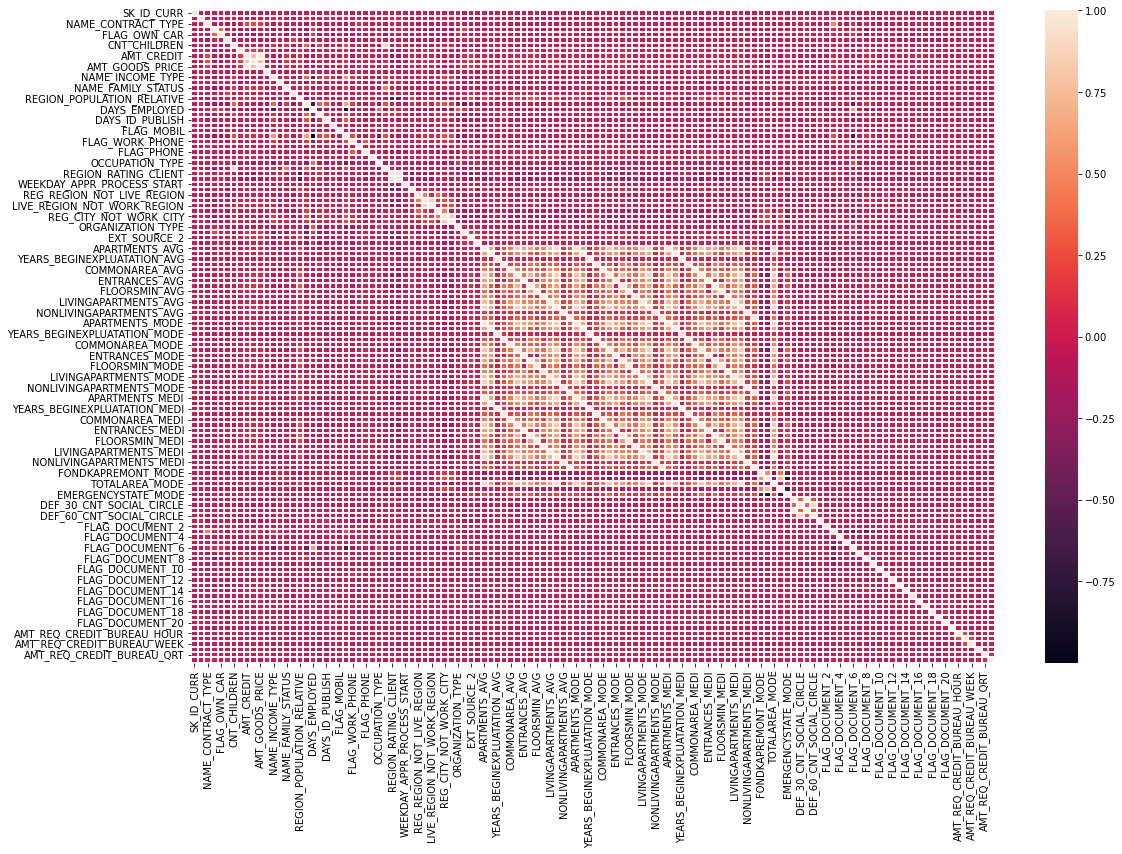

In [14]:
corr = df2.corr()

plt.subplots(figsize=(18, 12))
sns.heatmap(corr, linewidth=0.1)
plt.show()

In [15]:
target_corr = abs(corr['TARGET'].copy().drop(index=['TARGET'])).sort_values(ascending=False)
target_corr

EXT_SOURCE_2                   0.160295
EXT_SOURCE_3                   0.155892
EXT_SOURCE_1                   0.098887
DAYS_BIRTH                     0.078239
REGION_RATING_CLIENT_W_CITY    0.060893
                                 ...   
FLAG_MOBIL                     0.000534
FLAG_CONT_MOBILE               0.000370
FLAG_DOCUMENT_5                0.000316
FLAG_DOCUMENT_20               0.000215
AMT_REQ_CREDIT_BUREAU_HOUR     0.000074
Name: TARGET, Length: 121, dtype: float64

In [16]:
X = df2[df2.columns.copy().drop('TARGET')].values
y = df2['TARGET'].values
print(X.shape, y.shape)

(307511, 121) (307511,)


In [17]:
#Select features according to the k highest scores

from sklearn.feature_selection import SelectKBest, f_classif
X_select = SelectKBest(f_classif, k=2).fit_transform(X, y)
print(X_select)

[[0.26294859 0.13937578]
 [0.62224578 0.53527625]
 [0.55591208 0.72956669]
 ...
 [0.53572175 0.21885908]
 [0.51416282 0.66102354]
 [0.7085689  0.1139224 ]]


In [18]:
# Get the name of selected features
selected_features = []
for i in df2.columns:
    if all(df2.loc[:, i] == X_select[:, 0]) or all(df2.loc[:, i] == X_select[:, 1]):
        selected_features.append(i)
print(selected_features)

['EXT_SOURCE_2', 'EXT_SOURCE_3']


In [19]:
objects = df1.select_dtypes(include=[object])
objects

,NAME_TYPE_SUITE,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,WEEKDAY_APPR_PROCESS_START,ORGANIZATION_TYPE,NAME_HOUSING_TYPE,NAME_FAMILY_STATUS,NAME_EDUCATION_TYPE,NAME_INCOME_TYPE
0,Unaccompanied,Cash loans,M,N,Y,WEDNESDAY,Business Entity Type 3,House / apartment,Single / not married,Secondary / secondary special,Working
1,Family,Cash loans,F,N,N,MONDAY,School,House / apartment,Married,Higher education,State servant
2,Unaccompanied,Revolving loans,M,Y,Y,MONDAY,Government,House / apartment,Single / not married,Secondary / secondary special,Working
3,Unaccompanied,Cash loans,F,N,Y,WEDNESDAY,Business Entity Type 3,House / apartment,Civil marriage,Secondary / secondary special,Working
4,Unaccompanied,Cash loans,M,N,Y,THURSDAY,Religion,House / apartment,Single / not married,Secondary / secondary special,Working
...,...,...,...,...,...,...,...,...,...,...,...
307506,Unaccompanied,Cash loans,M,N,N,THURSDAY,Services,With parents,Separated,Secondary / secondary special,Working
307507,Unaccompanied,Cash loans,F,N,Y,MONDAY,XNA,House / apartment,Widow,Secondary / secondary special,Pensioner
307508,Unaccompanied,Cash loans,F,N,Y,THURSDAY,School,House / apartment,Separated,Higher education,Working
307509,Unaccompanied,Cash loans,F,N,Y,WEDNESDAY,Business Entity Type 1,House / apartment,Married,Secondary / secondary special,Commercial associate


In [20]:
objects.isna().sum()

NAME_TYPE_SUITE               1292
NAME_CONTRACT_TYPE               0
CODE_GENDER                      0
FLAG_OWN_CAR                     0
FLAG_OWN_REALTY                  0
WEEKDAY_APPR_PROCESS_START       0
ORGANIZATION_TYPE                0
NAME_HOUSING_TYPE                0
NAME_FAMILY_STATUS               0
NAME_EDUCATION_TYPE              0
NAME_INCOME_TYPE                 0
dtype: int64

In [21]:
df1['NAME_TYPE_SUITE'].value_counts()

Unaccompanied      248526
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: NAME_TYPE_SUITE, dtype: int64

In [22]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_select, y, train_size=0.75, test_size=0.25)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(230633, 2) (76878, 2) (230633,) (76878,)


In [23]:
# Standardizing the data
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [24]:
#Compare unstandardized and standardized data
print(X_train)
print(X_train_scaled)
print(X_test)
print(X_test_scaled)

[[0.16527608 0.52629494]
 [0.10271661 0.74766339]
 [0.39201953 0.49566583]
 ...
 [0.64813119 0.20796417]
 [0.6125038  0.69866756]
 [0.73553429 0.66263779]]
[[-1.82861789  0.0612829 ]
 [-2.15640055  1.32854518]
 [-0.6405872  -0.11405878]
 ...
 [ 0.70131933 -1.76105706]
 [ 0.51464831  1.04805998]
 [ 1.15927113  0.84180133]]
[[0.02826416 0.622922  ]
 [0.67523986 0.72956669]
 [0.66909616 0.35233997]
 ...
 [0.7588716  0.53527625]
 [0.588689   0.53527625]
 [0.61639947 0.28665248]]
[[-2.54649692  0.61444135]
 [ 0.84335625  1.22494747]
 [ 0.81116606 -0.93455263]
 ...
 [ 1.28154781  0.11269798]
 [ 0.38986979  0.11269798]
 [ 0.53505983 -1.31059212]]


In [25]:
from sklearn.metrics import *

def evaluation(test, predict):
    acc_score = accuracy_score(test, predict)
    prec_score = precision_score(test, predict)
    rec_score = recall_score(test, predict)
    f_score = f1_score(test, predict)
    conf_matrix = confusion_matrix(test, predict)
    print('Accuracy : {:.3f}'.format(acc_score))
    print('Precision: {:.3f}'.format(prec_score))
    print('Recall   : {:.3f}'.format(rec_score))
    print('F        : {:.3f}'.format(f_score))
    print('Confusion matrix:\n', conf_matrix)

In [26]:
# KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier

neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train_scaled, y_train)
predict_3 = neigh.predict(X_test_scaled)
evaluation(y_test, predict_3)

Accuracy : 0.904
Precision: 0.183
Recall   : 0.063
F        : 0.094
Confusion matrix:
 [[69092  1723]
 [ 5678   385]]


In [27]:
# DecisionTree
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier()
dtree.fit(X_train_scaled, y_train)
dtree_predict = dtree.predict(X_test_scaled)
evaluation(y_test, dtree_predict)

Accuracy : 0.861
Precision: 0.123
Recall   : 0.124
F        : 0.124
Confusion matrix:
 [[65470  5345]
 [ 5310   753]]


In [28]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier

r_forest = RandomForestClassifier()
r_forest.fit(X_train_scaled, y_train)
r_forest_predict = r_forest.predict(X_test_scaled)
evaluation(y_test, r_forest_predict)

Accuracy : 0.889
Precision: 0.136
Recall   : 0.075
F        : 0.097
Confusion matrix:
 [[67915  2900]
 [ 5607   456]]


In [29]:
# Calibrated probabilities of the above classifications
neigh_prob = neigh.predict_proba(X_test_scaled)
print("KNeighbors Classifier probas:")
print(neigh_prob)

dtree_prob = dtree.predict_proba(X_test_scaled)
print("DecisionTree probas:")
print(dtree_prob)

r_forest_prob = r_forest.predict_proba(X_test_scaled)
print("Random Forest probas:")
print(r_forest_prob)

KNeighbors Classifier probas:
[[1. 0.]
 [1. 0.]
 [1. 0.]
 ...
 [1. 0.]
 [1. 0.]
 [1. 0.]]
DecisionTree probas:
[[1. 0.]
 [1. 0.]
 [1. 0.]
 ...
 [1. 0.]
 [1. 0.]
 [1. 0.]]
Random Forest probas:
[[1.   0.  ]
 [0.99 0.01]
 [0.96 0.04]
 ...
 [1.   0.  ]
 [1.   0.  ]
 [0.79 0.21]]


In [30]:
# The average probability of all the above classifiers

average_prob = (neigh_prob + dtree_prob + r_forest_prob) / 3
average_prob

array([[1.        , 0.        ],
       [0.99666667, 0.00333333],
       [0.98666667, 0.01333333],
       ...,
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.93      , 0.07      ]])

In [31]:
df_test = pd.read_csv('application_test.csv')
df_test

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,Unaccompanied,Working,Higher education,Married,House / apartment,0.018850,-19241,-2329,-5170.0,-812,NaN,1,1,0,1,0,1,NaN,2.0,2,2,TUESDAY,18,0,0,0,0,0,0,Kindergarten,0.752614,0.789654,0.159520,0.0660,0.0590,0.9732,NaN,NaN,NaN,0.1379,0.1250,NaN,NaN,NaN,0.0505,NaN,NaN,0.0672,0.0612,0.9732,NaN,NaN,NaN,0.1379,0.1250,NaN,NaN,NaN,0.0526,NaN,NaN,0.0666,0.0590,0.9732,NaN,NaN,NaN,0.1379,0.1250,NaN,NaN,NaN,0.0514,NaN,NaN,NaN,block of flats,0.0392,"Stone, brick",No,0.0,0.0,0.0,0.0,-1740.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.035792,-18064,-4469,-9118.0,-1623,NaN,1,1,0,1,0,0,Low-skill Laborers,2.0,2,2,FRIDAY,9,0,0,0,0,0,0,Self-employed,0.564990,0.291656,0.432962,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,NaN,Working,Higher education,Married,House / apartment,0.019101,-20038,-4458,-2175.0,-3503,5.0,1,1,0,1,0,0,Drivers,2.0,2,2,MONDAY,14,0,0,0,0,0,0,Transport: type 3,NaN,0.699787,0.610991,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-856.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,Unaccompanied,Working,Secondary / secondary special,Marr

In [32]:
X_test_file = df_test[selected_features].values

In [33]:
# standardize the data
X_test_file_scaled = scaler.transform(X_test_file)
X_test_file_scaled

array([[ 1.44283519, -2.03838681],
       [-1.16644807, -0.47301969],
       [ 0.97197098,  0.54614214],
       ...,
       [ 0.62083146, -1.3274261 ],
       [-0.35932123,  0.45720861],
       [-0.3025263 , -1.39370751]])

In [34]:
X_test_file_scaled_finite = X_test_file_scaled[np.all(np.isfinite(X_test_file_scaled), axis=1)]
## This above line is there to remove any rows from our X_test_file_scaled dataset that contain nan or nonfinite values.

neigh_prob = neigh.predict_proba(X_test_file_scaled_finite)

dtree_prob = dtree.predict_proba(X_test_file_scaled_finite)
r_forest_prob = r_forest.predict_proba(X_test_file_scaled_finite)
average_prob = (neigh_prob + dtree_prob + r_forest_prob) / 3
predict_res = 1 - average_prob[:, 0]

In [35]:
pred = pd.Series(predict_res, name='TARGET')
final = pd.concat([df_test['SK_ID_CURR'], pred], axis=1)
final

,SK_ID_CURR,TARGET
0,100001,0.000000
1,100005,0.147778
2,100013,0.000000
3,100028,0.003333
4,100038,0.000000
...,...,...
48739,456221,NaN
48740,456222,NaN
48741,456223,NaN
48742,456224,NaN


In [36]:
final.to_csv('final_output_csv_file.csv', index=False)

In [37]:
pd.read_csv('final_output_csv_file.csv')

,SK_ID_CURR,TARGET
0,100001,0.000000
1,100005,0.147778
2,100013,0.000000
3,100028,0.003333
4,100038,0.000000
...,...,...
48739,456221,NaN
48740,456222,NaN
48741,456223,NaN
48742,456224,NaN


**- Which features to use:**

We chose `DAYS_BIRTH` and `REGION_RATING_CLIENT_W_CITY` as the feature to use in this assignment. They are chosen by **`sklearn.feature_selection`** with the scoring function `f_classif` used for classification only.

**- How to pre-process:**

- Remove the columns with missing value(s) and the columns that represents little in the real world.
- Visualize some statistics from the data.
- Change string value to dummy data.